In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


# Importing necesary packages

In [6]:
#Importing necesary packages
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

ModuleNotFoundError: No module named 'tensorflow'

# Load the training and testing data

In [3]:
#Load the traiming and testing data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

NameError: name 'mnist' is not defined

# Defining network architecture using Keras

In [6]:
#Defining network architecture using Keras
import keras 
model= Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# Training model using SGD

In [7]:
#Training model using SGD
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6616 - accuracy: 0.8328 - val_loss: 0.3542 - val_accuracy: 0.9046
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3336 - accuracy: 0.9077 - val_loss: 0.2889 - val_accuracy: 0.9193
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9215 - val_loss: 0.2563 - val_accuracy: 0.9283
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2528 - accuracy: 0.9298 - val_loss: 0.2329 - val_accuracy: 0.9334
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2298 - accuracy: 0.9367 - val_loss: 0.2153 - val_accuracy: 0.9379


# Evaluating the network

In [8]:
#Evaluating the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2153 - accuracy: 0.9379
Loss=0.215
Accuracy=0.938


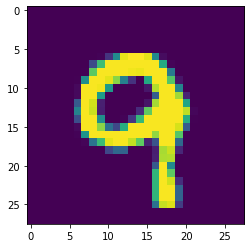

313/313 [==============================] - 0s 952us/step
The Handwritten number in the image is 9


In [9]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
prediction=model.predict(x_test)
print("The Handwritten number in the image is %d" % np.argmax(prediction[n]))

# Plot training loss and accuracy

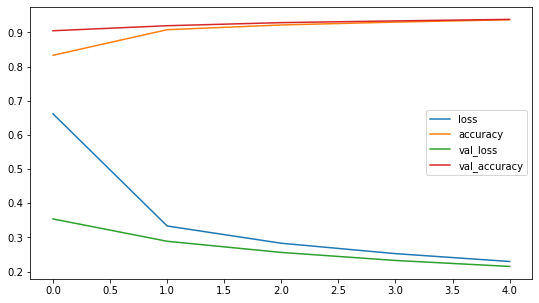

In [10]:
#Plot training loss and accuracy
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()

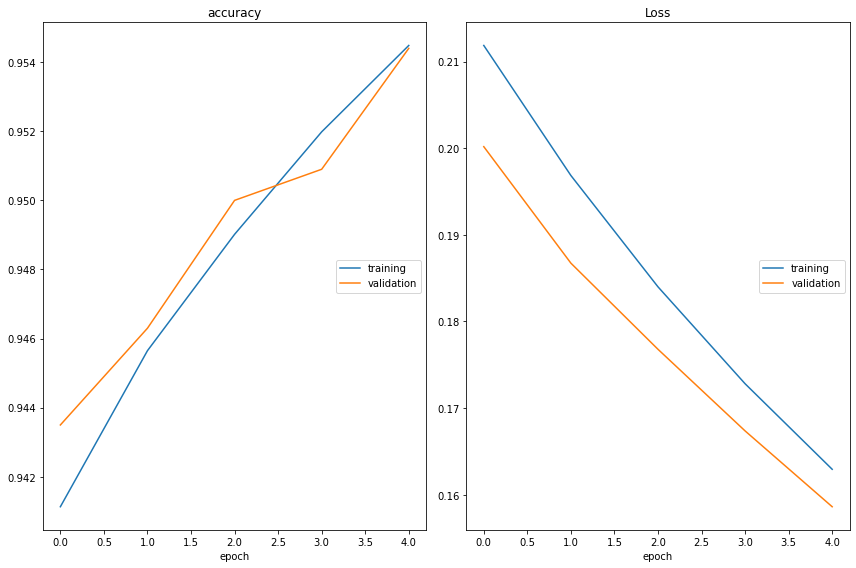

accuracy
	training         	 (min:    0.941, max:    0.954, cur:    0.954)
	validation       	 (min:    0.943, max:    0.954, cur:    0.954)
Loss
	training         	 (min:    0.163, max:    0.212, cur:    0.163)
	validation       	 (min:    0.159, max:    0.200, cur:    0.159)


In [11]:
#Plotting using keras
!pip install livelossplot
from livelossplot import PlotLossesKeras
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,callbacks=[PlotLossesKeras()],verbose=0)